# Classification Algorithm

# Knn - k nearestneighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
 df= pd.read_csv('data.csv')

In [5]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Cleaning

In [9]:
#FillNa
#Dropna

df.dropna(how='any',inplace=True)

In [11]:
len(df)

569

In [13]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [15]:
df.diagnosis.value_counts()/len(df)*100

diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64

# Spliting the data into x & y

In [17]:
X = df.drop(['id','diagnosis'],axis=1)

In [19]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
Y= df.diagnosis.values

# Train Test Split

# sklearn train test split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25) #75

In [25]:
len(X_train) # 75=569

426

In [27]:
len(X_test)

143

# Feature Scaling 2 type

# SklearnstandaredScalr 

In [29]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [31]:
X_train_sc

array([[ 0.247629  , -0.0032345 ,  0.21989375, ...,  0.55641057,
         0.07084771,  0.04126758],
       [-0.47464674, -0.81236228, -0.38375913, ...,  0.95014913,
         1.74095593,  2.30538281],
       [-0.87463211, -0.98846656, -0.8463092 , ..., -0.09044562,
         0.62428533,  0.38818846],
       ...,
       [ 1.45909549,  1.35324442,  1.69646377, ...,  0.99077294,
         0.42021541,  1.04437105],
       [-0.07178378,  0.11575488, -0.12868865, ..., -0.84979854,
        -0.66217144, -0.84942896],
       [-0.79405952, -0.11984409, -0.79329127, ..., -0.43543559,
         0.23083853, -0.92246494]])

In [33]:
X_test_sc

array([[ 0.14979085,  1.16762099,  0.11719762, ..., -0.68480333,
        -0.6474784 , -0.65828012],
       [ 1.18572419, -0.05796961,  1.12453814, ...,  1.00483504,
        -0.17403619, -0.11507506],
       [ 1.8821016 , -0.41969733,  1.79665512, ...,  1.52981977,
        -0.37484099, -0.76726349],
       ...,
       [-0.81708026,  0.17048999, -0.85424101, ..., -1.32759714,
        -0.59033883, -0.44887229],
       [-1.69215617,  0.37753151, -1.60692853, ..., -0.53902632,
         0.65856908,  3.68621921],
       [-0.63579193, -0.41731754, -0.64968367, ..., -0.37231242,
        -1.14051133, -1.35041011]])

# Model Building

In [35]:
from sklearn.neighbors import KNeighborsClassifier

#Initiate the classifier
model_knn = KNeighborsClassifier()

# Passing  the data to classifier
model_knn.fit(X_train_sc,Y_train)

KNeighborsClassifier()

In [37]:
y_pred_knn = model_knn.predict(X_test_sc)

In [39]:
y_pred_knn

array(['B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
      dtype=object)

In [41]:
Y_test

array(['B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
      dtype=object)

In [43]:
#Classification metrix to check  how the model behaves
from sklearn.metrics import accuracy_score

print(round(accuracy_score(Y_test,y_pred_knn)*100,2))

97.9


In [102]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           B       0.99      0.98      0.98        91
           M       0.96      0.98      0.97        52

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



# Predict the for a new patient

In [45]:
new_data =[ [22.57,	16.77	,131.9	,1326,	0.08474,	0.07864	,0.0869	,0.07017,	0.1812,
0.05667,	0.5435,	0.7339,	3.398	,74.08	,0.005225	,0.01308	,0.0186,	0.0134	,
0.01389	,0.003532,	24.99	,23.41,	158.8,	1956	,0.1238,	0.1866	,0.2416,
0.186	,0.275	,0.08902]]


In [47]:
new_data_sc = sc.transform(new_data)

C:\Users\yuvar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
new_data_sc

array([[ 2.43747698, -0.557725  ,  1.67559057,  1.93365206, -0.85770164,
        -0.49260321,  0.02899881,  0.59850649,  0.0077402 , -0.90417561,
         0.50747745, -0.90296075,  0.2717838 ,  0.71262955, -0.6011755 ,
        -0.69874983, -0.52174651,  0.32098685, -0.81367595, -0.08744342,
         1.83217478, -0.33591079,  1.55706666,  1.90178963, -0.40142175,
        -0.42901602, -0.11202366,  1.13608122, -0.27525487,  0.28662281]])

In [51]:
y_pred_single = model_knn.predict(new_data_sc)

In [53]:
y_pred_single

array(['M'], dtype=object)

In [57]:
new_data_1 = [ [20.57,	19.77	,131.9	,1326,	0.08474,	0.7864	,0.0869	,0.07017,	0.1812,
0.05667,	0.5435,	0.7339,	3.398	,74.08	,0.05225	,0.01308	,0.0186,	0.0134	,
0.01389	,0.003532,	24.99	,23.41,	158.8,	1956	,0.1238,	0.1866	,0.2416,
0.186	,0.275	,0.08902]]

In [59]:
new_data_1_sc = sc.transform(new_data_1)
y_pred_single2 = model_knn.predict(new_data_1_sc)

C:\Users\yuvar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
y_pred_single2

array(['M'], dtype=object)

# Dicision Tree classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier 

#Initiate the classifier 
model_dt = DecisionTreeClassifier()

#Passing the data to classifier
model_dt.fit(X_train_sc ,Y_train)

DecisionTreeClassifier()

In [65]:
y_pred_dt  = model_dt.predict(X_test_sc)

In [67]:
#Classification metrics to check how the model behaves
from sklearn.metrics import accuracy_score

print(round(accuracy_score(Y_test, y_pred_dt)*100,2))

95.1


[Text(0.7425, 0.9444444444444444, 'x[23] <= -0.003\ngini = 0.469\nsamples = 426\nvalue = [266, 160]'),
 Text(0.565, 0.8333333333333334, 'x[27] <= 0.504\ngini = 0.166\nsamples = 284\nvalue = [258, 26]'),
 Text(0.65375, 0.8888888888888888, 'True  '),
 Text(0.41, 0.7222222222222222, 'x[27] <= 0.298\ngini = 0.073\nsamples = 264\nvalue = [254, 10]'),
 Text(0.3, 0.6111111111111112, 'x[13] <= 1.079\ngini = 0.032\nsamples = 246\nvalue = [242, 4]'),
 Text(0.26, 0.5, 'x[13] <= 0.181\ngini = 0.024\nsamples = 245\nvalue = [242, 3]'),
 Text(0.16, 0.3888888888888889, 'x[14] <= -1.244\ngini = 0.016\nsamples = 241\nvalue = [239, 2]'),
 Text(0.08, 0.2777777777777778, 'x[27] <= -0.313\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.04, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.12, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.24, 0.2777777777777778, 'x[21] <= 1.31\ngini = 0.008\nsamples = 237\nvalue = [236.0, 1.0]'),
 Text(0.2, 0.1666666666

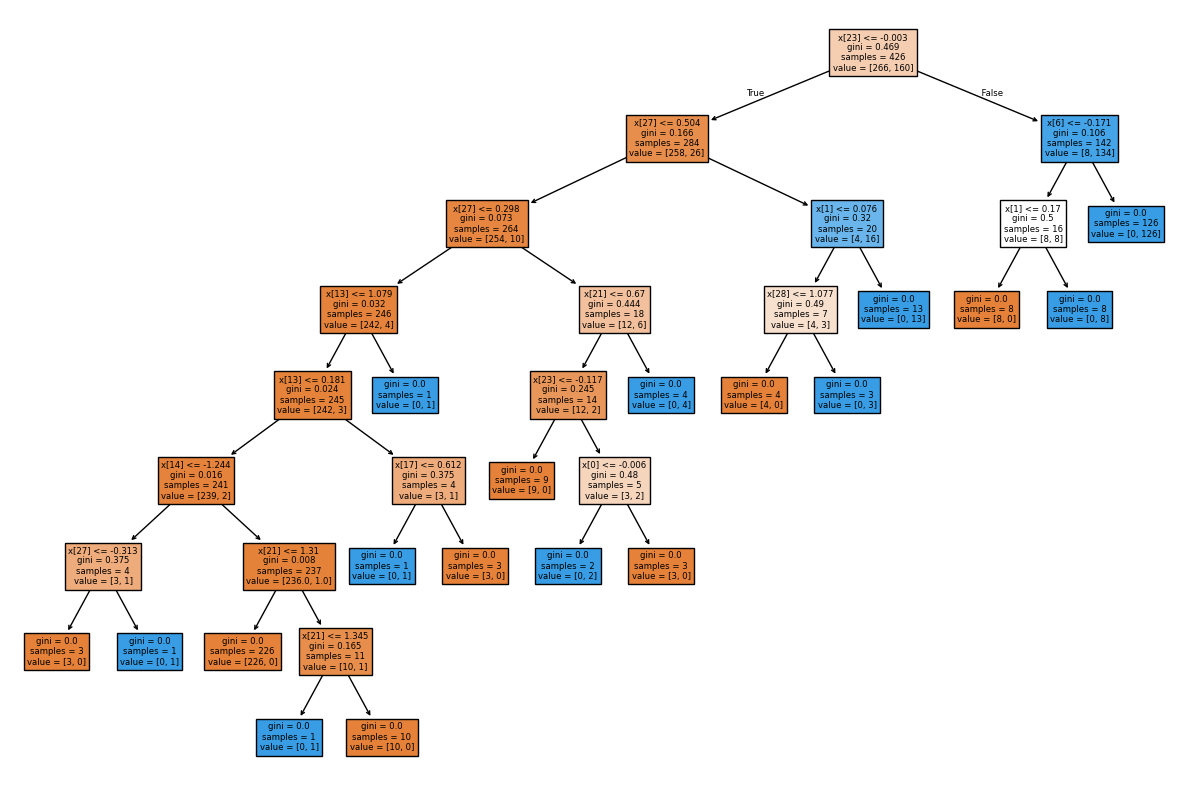

In [69]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model_dt,filled=True)

# Model Building -RF

In [71]:
from sklearn.ensemble import RandomForestClassifier 

#Initiate the classifier 
model_rf = RandomForestClassifier()

#Passing the data to classifier
model_rf.fit(X_train_sc ,Y_train)

RandomForestClassifier()

In [73]:
y_pred_rf = model_rf.predict(X_test_sc)

In [75]:
# Classification metrics to check how the model behaves
from sklearn .metrics import accuracy_score

print(round(accuracy_score(Y_test,y_pred_rf)*100,2))

97.2


# Model Building -NB

In [77]:
from sklearn.naive_bayes import GaussianNB

#Initiate the classifier 
model_nb = GaussianNB()

#Passing the data to classifier
model_nb.fit(X_train_sc ,Y_train)

GaussianNB()

In [79]:
y_pred_nb = model_nb.predict(X_test_sc)

In [81]:
from sklearn .metrics import accuracy_score

print(round(accuracy_score(Y_test,y_pred_nb)*100,2))

92.31


# Model Building -SVC

In [83]:
from sklearn.svm import SVC

# Initiate the classifier
model_svc = SVC()

#Passing the data to classifier
model_svc.fit(X_train_sc,Y_train)

SVC()

In [85]:
y_pred_svc = model_nb.predict(X_test_sc)

In [89]:
# Classification metrics to check how the the model behaves
from sklearn .metrics import accuracy_score 
print(round(accuracy_score(Y_test, y_pred_svc)*100,2))

92.31


In [96]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,y_pred_svc))

[[82  9]
 [ 2 50]]


In [100]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_svc))

              precision    recall  f1-score   support

           B       0.98      0.90      0.94        91
           M       0.85      0.96      0.90        52

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143

